In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Define the SimCNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # Output layer with 10 units for 10 classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# Compile the model with SGD optimizer and default parameters for learning rate, decay, and momentum
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.0),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    batch_size=32,
    epochs=25,
    steps_per_epoch = 550,
    validation_data=(test_images, test_labels),
    validation_steps=1
)

Epoch 1/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 43s 75ms/step - accuracy: 0.3268 - loss: 1.9337 - val_accuracy: 0.5312 - val_loss: 1.2485
Epoch 2/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.4889 - loss: 1.4415 - val_accuracy: 0.4062 - val_loss: 1.7755
Epoch 3/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.5253 - loss: 1.3299 - val_accuracy: 0.5625 - val_loss: 1.2026
Epoch 4/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


550/550 ━━━━━━━━━━━━━━━━━━━━ 75s 63ms/step - accuracy: 0.5797 - loss: 1.1883 - val_accuracy: 0.6250 - val_loss: 1.2571
Epoch 5/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.5938 - loss: 1.1517 - val_accuracy: 0.5000 - val_loss: 1.9031
Epoch 6/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.6102 - loss: 1.1154 - val_accuracy: 0.4375 - val_loss: 1.6175
Epoch 7/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.6410 - loss: 1.0155 - val_accuracy: 0.5938 - val_loss: 1.2407
Epoch 8/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.6565 - loss: 0.9945 - val_accuracy: 0.4688 - val_loss: 1.4054
Epoch 9/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.6525 - loss: 0.9817 - val_accuracy: 0.3125 - val_loss: 1.6202
Epoch 10/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.6813 - loss: 0.9003 - val_accuracy: 0.5000 - val_loss: 1.2104
Epoch 11/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.6820 - loss: 0.9045 - val_accur

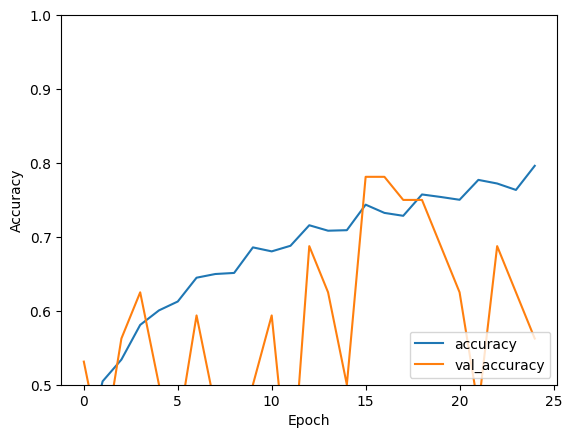

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)



313/313 - 7s - 23ms/step - accuracy: 0.6875 - loss: 0.9260


In [ ]:
# Print the test accuracy and loss
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print("Training Accuracy over epochs:", history.history['accuracy'])


Test Accuracy: 68.75%
Test Loss: 0.9260
Training Accuracy over epochs: [0.3988068103790283, 0.5046022534370422, 0.533986508846283, 0.5809090733528137, 0.6005681753158569, 0.6125675439834595, 0.6447727084159851, 0.6497727036476135, 0.6512162089347839, 0.6857954263687134, 0.6803977489471436, 0.6879729628562927, 0.7157386541366577, 0.708352267742157, 0.7090540528297424, 0.7435795664787292, 0.7324431538581848, 0.7285135388374329, 0.7573863863945007, 0.7539772987365723, 0.7502027153968811, 0.7771022915840149, 0.7722159028053284, 0.7635135054588318, 0.7961363792419434]
